In [2]:
import csv
import numpy as np

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from datetime import datetime

import matplotlib.pylab as plt
import matplotlib

from pandas import DataFrame

%matplotlib inline

## Read data and Preprocessing

Read in the historic stock data of MSFT (Microsoft) of the last 10 years.
Treat header and data seperated

In [3]:
data = []
header = []

with open('data/HistoricalQuotes.csv', 'r') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    for row in spamreader:       
        try:
            row[0] = datetime.strptime(row[0], '%Y/%m/%d')
        except:
            print ('Could not convert ' + row[0] + ': skip')
        row.pop(2)
        data.append(row)
        
header.append(data.pop(0))

print('Loose latest entry: ' + str(data.pop(0)))

Could not convert date: skip
Could not convert 11:41: skip
Loose latest entry: ['11:41', '60.03', '60.43', '60.46', '59.80']


In [124]:
DataFrame(data, columns = header[0])[0:10]

,date,close,open,high,low
0,2016-12-05,60.2200,59.7000,60.5850,59.5600
1,2016-12-02,59.2500,59.0800,59.4700,58.8000
2,2016-12-01,59.2000,60.1100,60.1500,58.9350
3,2016-11-30,60.2600,60.8600,61.1800,60.2150
4,2016-11-29,61.0900,60.6500,61.4100,60.5200
5,2016-11-28,60.6100,60.3400,61.0200,60.2100
6,2016-11-25,60.5300,60.3000,60.5300,60.1300
7,2016-11-23,60.4000,61.0100,61.1000,60.2500
8,2016-11-22,61.1200,60.9800,61.2600,60.8050
9,2016-11-21,60.8600,60.5000,60.9700,60.4200


## Create Timeline

Function to build a timeline using a given window

In [125]:
def buid_timeline_data(data, window):
    timeline = []
    labels = []
    
    timeline_wd = []
    labels_wd = []
    
    timeline_element = []
    current_window = 0
    
    reverse_data = list(reversed(data))
    reverse_data.pop(len(reverse_data)-1) # Delete the last day due to different format
    
    for i in range(len(reverse_data)):       
        if(i+window+1 < len(reverse_data)): 
            timeline_element, label, timeline_element_wd, label_wd = get_timeline_data(reverse_data, window, i)
            
            timeline.append(timeline_element)
            timeline_wd.append(timeline_element_wd)
            labels.append(label)
            labels_wd.append(label_wd)
            
    return timeline, labels, timeline_wd, labels_wd

In [126]:
def get_timeline_data(data, window, current_index):   
    timeline_element = []
    timeline_element_wd = []
    
    #Get the Data for each stock day
    for i in range(window):  
        timeline_element += data[current_index+i][1:]
        timeline_element_wd += data[current_index+i]
    
    label = data[current_index+window][1:]
    label_wd = data[current_index+window]
    
    return timeline_element, label, timeline_element_wd, label_wd

In [139]:
window_size = 5

timeline, labels, timeline_wd, labels_wd = buid_timeline_data(data, window_size)

#Data without date
timeline = np.array(timeline).astype(float) 
labels = np.array(labels).astype(float)
#Data with date
timeline_wd = np.array(timeline_wd)
labels_wd = np.array(labels_wd)

print('Shape of Timeline: ' + str(timeline.shape))
print('Shape of Labels: ' + str(labels.shape))

Shape of Timeline: (2511, 20)
Shape of Labels: (2511, 4)


In [140]:
DataFrame(timeline_wd, columns=header[0]*5)

,date,close,open,high,low,date,close,open,high,low,...,date,close,open,high,low,date,close,open,high,low
0,2006-12-05 00:00:00,29.1300,29.3600,29.4000,29.0300,2006-12-06 00:00:00,28.9900,29.0950,29.1300,28.8700,...,2006-12-08 00:00:00,29.4000,28.8200,29.4000,28.8000,2006-12-11 00:00:00,29.5400,29.1850,29.7500,29.1100
1,2006-12-06 00:00:00,28.9900,29.0950,29.1300,28.8700,2006-12-07 00:00:00,28.8500,28.9600,29.0700,28.8100,...,2006-12-11 00:00:00,29.5400,29.1850,29.7500,29.1100,2006-12-12 00:00:00,29.4300,29.5200,29.6300,29.2200
2,2006-12-07 00:00:00,28.8500,28.9600,29.0700,28.8100,2006-12-08 00:00:00,29.4000,28.8200,29.4000,28.8000,...,2006-12-12 00:00:00,29.4300,29.5200,29.6300,29.2200,2006-12-13 00:00:00,29.5500,29.6000,29.6000,29.3200
3,2006-12-08 00:00:00,29.4000,28.8200,29.4000,28.8000,2006-12-11 00:00:00,29.5400,29.1850,29.7500,29.1100,...,2006-12-13 00:00:00,29.5500,29.6000,29.6000,29.3200,2006-12-14 00:00:00,30.0700,29.5450,30.0801,29.5200
4,2006-12-11 00:00:00,29.5400,29.1850,29.7500,29.1100,2006-12-12 00:00:00,29.4300,29.5200,29.6300,29.2200,...,2006-12-14 00:00:00,30.0700,29.5450,30.0801,29.5200,2006-12-15 00:00:00,30.1900,30.1450,30.2300,30.0300
5,2006-12-12 00:00:00,29.4300,29.5200,29.6300,29.2200,2006-12-13 00:00:00,29.5500,29.6000,29.6000,29.3200,...,2006-12-15 00:00:00,30.1900,30.1450,30.2300,30.0300,2006-12-18 00:00:00,29.8900,30.1900,30.2600,29.7800
6,2006-12-13 00:00:00,29.5500,29.6000,29.6000,29.3200,2006-12-14 00:00:00,30.0700,29.5450,30.0801,29.5200,...,2006-12-18 00:00:00,29.8900,30.1900,30.2600,29.7800,2006-12-19 00:00:00,29.9900,29.6950,30.1700,29.5300
7,2006-12-14 00:00:00,30.0700,29.5450,30.0801,29.5200,2006-12-15 00:00:00,30.1900,30.1450,30.2300,30.0300,...,2006-12-19 00:00:00,29.9900,29.6950,30.1700,29.5300,2006-12-20 00:00:00,30.0900,29.9850,30.2400,29.9700
8,2006-12-15 00:00:00,30.1900,30.1450,30.2300,30.0300,2006-12-18 00:00:00,29.8900,30.1900,30.2600,29.7800,...,2006-12-20 00:00:00,30.0900,29.9850,30.2400,29.9700,2006-12-21 00:00:00,29.9800,30.1300,30.1400,29.8900
9,2006-12-18 00:00:00,29.8900,30.1900,30.2600,29.7800,2006-12-19 00:00:00,29.9900,29.6950,30.1700,29.5300,...,2006-12-21 00:00:00,29.9800,30.1300,30.1400,29.8900,2006-12-22 00:00:00,29.6400,29.8200,29.8600,29.6200


## Support Vector Machine calculating Regression

In [156]:
X_train, X_test, y_train, y_test = train_test_split(timeline, labels)

#close
regressor_close = SVR(C=100)
regressor_close.fit(X_train, y_train[:,0])
#open
regressor_open = SVR()
regressor_open.fit(X_train, y_train[:,1])
#high
regressor_high = SVR()
regressor_high.fit(X_train, y_train[:,2])
#low
regressor_low = SVR()
regressor_low.fit(X_train, y_train[:,3])

score = regressor_close.score(X_test, y_test[:,0])
print ('Close Score: ' + str(score))

score = regressor_open.score(X_test, y_test[:,1])
print ('Open Score: ' + str(score))

score = regressor_high.score(X_test, y_test[:,2])
print ('High Score: ' + str(score))

score = regressor_low.score(X_test, y_test[:,3])
print ('Low Score: ' + str(score))

Close Score: 0.982987482448
Open Score: 0.930093029332
High Score: 0.929963673398
Low Score: 0.929834172502


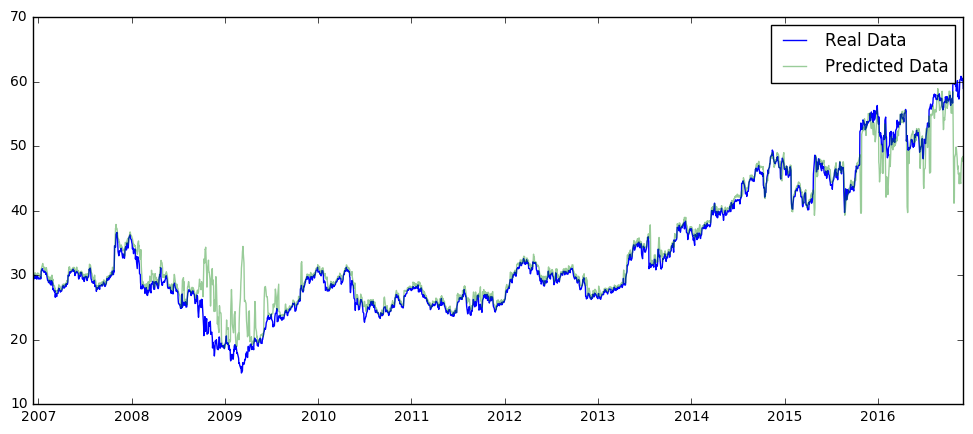

In [174]:
dates = matplotlib.dates.date2num(labels_wd[:,0])

plt.figure(num=None, figsize=(12, 5), dpi=80)

plt.plot_date(dates, labels[:,3],'b-', c='blue', label='Real Data')
plt.plot_date(dates, regressor_high.predict(timeline),'b-', c='green', alpha=0.4, label='Predicted Data')
plt.legend()

plt.show()